In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

In [3]:
trainData.info()
testData.info()
trainData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0, 0.5, 'Survival')

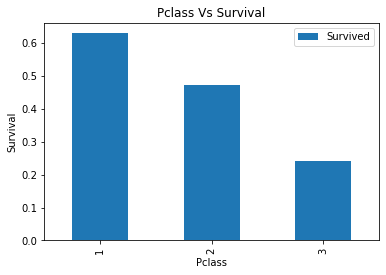

In [5]:
# PClass vs Survival
Ftrs = trainData[['Pclass', 'Survived']].groupby(['Pclass']).mean()
Ftrs.plot(kind= 'bar')
plt.title("Pclass Vs Survival")
plt.xlabel("Pclass")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

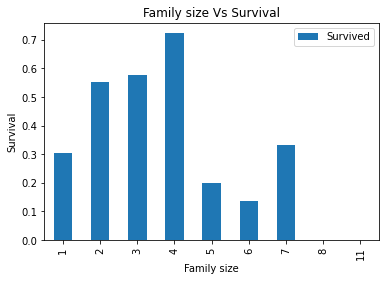

In [6]:
# Survival Vs FamilySize

# Defining Family Size
trainData['Fam'] = trainData['SibSp']+ trainData['Parch'] + 1
testData['Fam'] = testData['SibSp']+ testData['Parch'] + 1

#Dropping columns SibSp, and Parch 
trainData.drop(columns = ['SibSp', 'Parch'], inplace= True)
testData.drop(columns= ['SibSp', 'Parch'], inplace= True)

#Plotting chance of survival Vs Size of the family/group
Ftrs = trainData[['Fam', 'Survived']].groupby(['Fam']).mean()
Ftrs.plot(kind= 'bar')
plt.title("Family size Vs Survival")
plt.xlabel("Family size")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

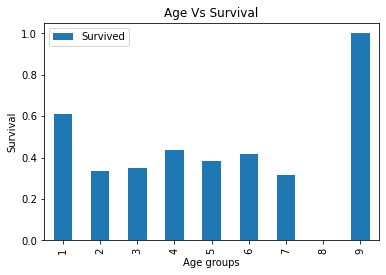

In [7]:
# AGE
# filling null values with most probable ages
trainData['Age'] = trainData['Age'].fillna(np.random.randint(trainData['Age'].mean() - trainData['Age'].std(), trainData['Age'].mean() + trainData['Age'].std()))

testData['Age'] = testData['Age'].fillna(np.random.randint(testData['Age'].mean() - testData['Age'].std(), testData['Age'].mean() + testData['Age'].std()))


trainData['categoricalAge'] = pd.cut(trainData['Age'], bins= [0, 9, 19, 29, 39, 49, 59, 69, 79, 89], labels= ['1','2', '3', '4', '5', '6', '7', '8', '9'] ).astype(int)
testData['categoricalAge'] = pd.cut(testData['Age'], bins= [0, 9, 19, 29, 39, 49, 59, 69, 79, 89], labels= ['1','2', '3', '4', '5', '6', '7', '8', '9'] ).astype(int)

Ftrs = trainData[['categoricalAge', 'Survived']].groupby(['categoricalAge']).mean()
Ftrs.plot(kind= 'bar')
plt.title("Age Vs Survival")
plt.xlabel("Age groups")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

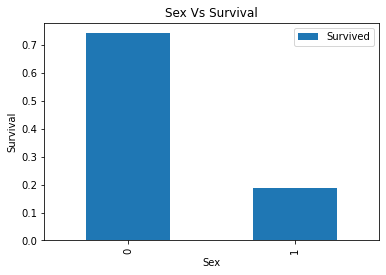

In [8]:
# SEX
# Converting the categories to numerical data
trainData['Sex'] = trainData['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
testData['Sex'] = testData['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Plotting Sex Vs SurvivalRate
Ftrs = trainData[['Sex', 'Survived']].groupby(['Sex']).mean()
Ftrs.plot(kind= 'bar')
plt.title("Sex Vs Survival")
plt.xlabel("Sex")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

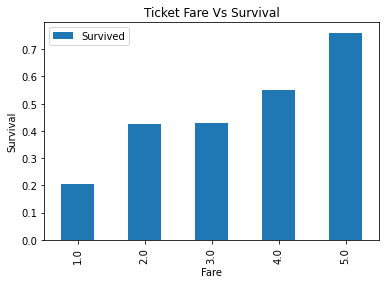

In [9]:
# FARE
trainData['Fare'] = trainData['Fare'].fillna(trainData['Fare'].median())
trainData['FareCategory'] = pd.cut(trainData['Fare'],bins= [0, 10, 20, 40, 80, 320, 512], labels=['1', '2', '3', '4', '5', '6'], ).astype(float)

testData['Fare'] = testData['Fare'].fillna(testData['Fare'].median())
testData['FareCategory'] = pd.cut(testData['Fare'],bins= [0, 10, 20, 40, 80, 320, 512], labels=['1', '2', '3', '4', '5', '6'], ).astype(float)

Ftrs = trainData[['FareCategory', 'Survived']].groupby(['FareCategory']).mean()
Ftrs.plot(kind= 'bar')
plt.title("Ticket Fare Vs Survival")
plt.xlabel("Fare")
plt.ylabel("Survival")

In [10]:
# column to determine whether the passenger is travelling alone or not
trainData['IsAlone'] = 0
trainData.loc[trainData['Fam'] == 1, ['IsAlone']] = 1

testData['IsAlone'] = 0
testData.loc[testData['Fam'] == 1, ['IsAlone']] = 1

In [11]:
trainData.drop(columns= ['Name', 'Cabin', 'Embarked', 'Ticket', 'Age', 'Fare'], inplace= True)
testData.drop(columns= ['Name', 'Cabin', 'Embarked', 'Ticket', 'Age', 'Fare'], inplace= True)

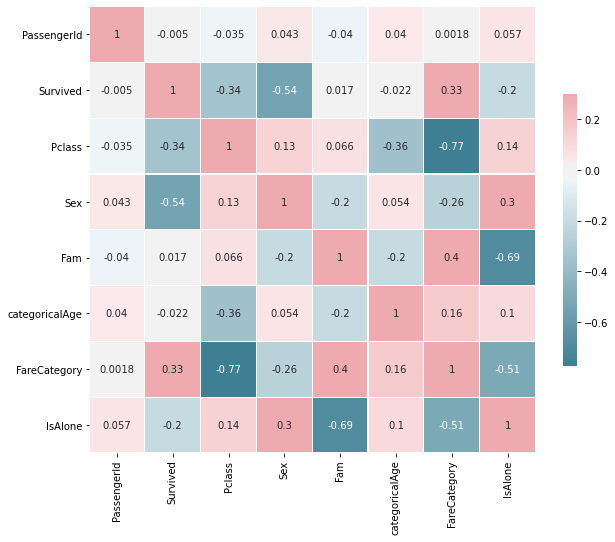

In [12]:
corr_mat = trainData.corr()
plt.figure(figsize = (10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_mat, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=0.2, cbar_kws={"shrink": .5} , annot=True)

In [13]:
trainData.info()
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Sex             891 non-null    int32  
 4   Fam             891 non-null    int64  
 5   categoricalAge  891 non-null    int32  
 6   FareCategory    873 non-null    float64
 7   IsAlone         891 non-null    int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 48.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Pclass          418 non-null    int64  
 2   Sex             418 non-null    int32  
 3   Fam             418 non-null    int64  
 4   catego

In [14]:
X_train = trainData.drop(columns= ['Survived'])
y_train = trainData['Survived']
X_test = testData